<a href="https://colab.research.google.com/github/Tesfayesus40/PROJ/blob/master/Big_Data_and_Climate_Change_Analysis_PART_1_%5BTesfayesus%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install pyspark

In [2]:
pip install pyspark

In [3]:
from pyspark import SparkContext
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import *

In [4]:
spark = SparkSession.builder.getOrCreate()
sc = SparkContext.getOrCreate()

In [5]:
# define schemas for stations
schema_stationsT = StructType([
    StructField('ID', StringType()),
    StructField('COUNTRY', StringType()),
    StructField('PRECP_VALUE', IntegerType()),
    StructField('LATITUDE', DoubleType()),
    StructField('LONGITUDE', DoubleType()),
    StructField('STNELEV', DoubleType()),
    StructField('NAME', StringType()),
])

In [6]:
# Define Schema for tempratrue data All
schema_TempDataAll = StructType([
    StructField('ID', StringType()),
    StructField('COUNTRY', StringType()),
    StructField('DATE', StringType()),
    StructField('ELEMENT', StringType()),
    StructField('VALUE-JAN', IntegerType()),
    StructField('DQS-1', StringType()),
    StructField('VALUE-FEB', IntegerType()),
    StructField('DQS-2', StringType()),
    StructField('VALUE-MAR', IntegerType()),
    StructField('DQS-3', StringType()),
    StructField('VALUE-APR', IntegerType()),
    StructField('DQS-4', StringType()),
    StructField('VALUE-MAY', IntegerType()),
    StructField('DQS-5', StringType()),
    StructField('VALUE-JUN', IntegerType()),
    StructField('DQS-6', StringType()),
    StructField('VALUE-JUL', IntegerType()),
    StructField('DQS-7', StringType()),
    StructField('VALUE-AUG', IntegerType()),
    StructField('DQS-8', StringType()),
    StructField('VALUE-SEP', IntegerType()),
    StructField('DQS-9', StringType()),
    StructField('VALUE-OCT', IntegerType()),
    StructField('DQS-10', StringType()),
    StructField('VALUE-NOV', IntegerType()),
    StructField('DQS-11', StringType()),
    StructField('VALUE-DEC', IntegerType()),
    StructField('DQS-12', StringType()),
])

In [7]:
# Loading stations data from "invent" files converted to .txt
# I made a seperate column "Country" for ease of filtering data by countries

df_stationsT=spark.read.format("text").load("/content/invent.txt")
stations=df_stationsT.select(
 F.trim(F.substring(F.col('value'), 1, 11)).alias('ID').cast(schema_stationsT['ID'].dataType),
    F.trim(F.substring(F.col('value'), 1, 2)).alias('COUNTRY').cast(schema_stationsT['COUNTRY'].dataType),
    F.trim(F.substring(F.col('value'), 13, 8)).alias('LATITUDE').cast(schema_stationsT['LATITUDE'].dataType),
    F.trim(F.substring(F.col('value'), 22, 9)).alias('LONGITUDE').cast(schema_stationsT['LONGITUDE'].dataType),
    F.trim(F.substring(F.col('value'), 32, 6)).alias('ELEVATION').cast(schema_stationsT['STNELEV'].dataType),
    F.trim(F.substring(F.col('value'), 42, 30)).alias('STATION_NAME').cast(schema_stationsT['NAME'].dataType),
    )
stations.show()

+-----------+-------+--------+---------+---------+--------------------+
|         ID|COUNTRY|LATITUDE|LONGITUDE|ELEVATION|        STATION_NAME|
+-----------+-------+--------+---------+---------+--------------------+
|ACW00011604|     AC| 57.7667|  11.8667|     18.0|                   E|
|AE000041196|     AE|  25.333|   55.517|     34.0|     RJAH_INTER_AIRP|
|AEM00041184|     AE|  25.617|   55.933|     31.0|    _AL_KHAIMAH_INTE|
|AEM00041194|     AE|  25.255|   55.364|     10.4|             AI_INTL|
|AEM00041216|     AE|   24.43|    54.47|      3.0|   _DHABI_BATEEN_AIR|
|AEM00041217|     AE|  24.433|   54.651|     26.8|         _DHABI_INTL|
|AEM00041218|     AE|  24.262|   55.609|    264.9|            AIN_INTL|
|AF000040930|     AF|  35.317|   69.017|   3366.0|           TH_SALANG|
|AFM00040911|     AF|    36.7|     67.2|    378.0|         AR_I_SHARIF|
|AFM00040938|     AF|   34.21|   62.228|    977.2|                  AT|
|AFM00040948|     AF|  34.566|   69.212|   1791.3|             U

In [8]:
#Load all tempratre data for all countries recorded from converted .txt files

df_TempDataAll=spark.read.format("text").load("/content/TempData.txt")
TempDataAllMonths=df_TempDataAll.select(
 F.trim(F.substring(F.col('value'), 1, 11)).alias('ID').cast(schema_TempDataAll['ID'].dataType),
    F.trim(F.substring(F.col('value'), 1, 2)).alias('COUNTRY').cast(schema_TempDataAll['COUNTRY'].dataType),
    F.trim(F.substring(F.col('value'), 12, 4)).alias('DATE').cast(schema_TempDataAll['DATE'].dataType),
    F.trim(F.substring(F.col('value'), 16, 4)).alias('ELEMENT').cast(schema_TempDataAll['ELEMENT'].dataType),
    F.trim(F.substring(F.col('value'), 20, 5)).alias('VALUE-JAN').cast(schema_TempDataAll['VALUE-JAN'].dataType),
    F.trim(F.substring(F.col('value'), 25, 3)).alias('DQS-1').cast(schema_TempDataAll['DQS-1'].dataType),
    F.trim(F.substring(F.col('value'), 28, 5)).alias('VALUE-FEB').cast(schema_TempDataAll['VALUE-FEB'].dataType),
    F.trim(F.substring(F.col('value'), 33, 3)).alias('DQS-2').cast(schema_TempDataAll['DQS-2'].dataType),
    F.trim(F.substring(F.col('value'), 36, 5)).alias('VALUE-MAR').cast(schema_TempDataAll['VALUE-MAR'].dataType),
    F.trim(F.substring(F.col('value'), 41, 3)).alias('DQS-3').cast(schema_TempDataAll['DQS-3'].dataType),
    F.trim(F.substring(F.col('value'), 44, 5)).alias('VALUE-APR').cast(schema_TempDataAll['VALUE-APR'].dataType),
    F.trim(F.substring(F.col('value'), 49, 3)).alias('DQS-4').cast(schema_TempDataAll['DQS-4'].dataType),
    F.trim(F.substring(F.col('value'), 52, 5)).alias('VALUE-MAY').cast(schema_TempDataAll['VALUE-MAY'].dataType),
    F.trim(F.substring(F.col('value'), 57, 3)).alias('DQS-5').cast(schema_TempDataAll['DQS-5'].dataType),
    F.trim(F.substring(F.col('value'), 60, 5)).alias('VALUE-JUN').cast(schema_TempDataAll['VALUE-JUN'].dataType),
    F.trim(F.substring(F.col('value'), 65, 3)).alias('DQS-6').cast(schema_TempDataAll['DQS-6'].dataType),
    F.trim(F.substring(F.col('value'), 68, 5)).alias('VALUE-JUL').cast(schema_TempDataAll['VALUE-JUL'].dataType),
    F.trim(F.substring(F.col('value'), 73, 3)).alias('DQS-7').cast(schema_TempDataAll['DQS-7'].dataType),
    F.trim(F.substring(F.col('value'), 76, 5)).alias('VALUE-AUG').cast(schema_TempDataAll['VALUE-AUG'].dataType),
    F.trim(F.substring(F.col('value'), 81, 3)).alias('DQS-8').cast(schema_TempDataAll['DQS-8'].dataType),
    F.trim(F.substring(F.col('value'), 84, 5)).alias('VALUE-SEP').cast(schema_TempDataAll['VALUE-SEP'].dataType),
    F.trim(F.substring(F.col('value'), 89, 3)).alias('DQS-9').cast(schema_TempDataAll['DQS-9'].dataType),
    F.trim(F.substring(F.col('value'), 92, 5)).alias('VALUE-OCT').cast(schema_TempDataAll['VALUE-OCT'].dataType),
    F.trim(F.substring(F.col('value'), 97, 3)).alias('DQS-10').cast(schema_TempDataAll['DQS-10'].dataType),
    F.trim(F.substring(F.col('value'), 100, 5)).alias('VALUE-NOV').cast(schema_TempDataAll['VALUE-NOV'].dataType),
    F.trim(F.substring(F.col('value'), 105, 3)).alias('DQS-11').cast(schema_TempDataAll['DQS-11'].dataType),
    F.trim(F.substring(F.col('value'), 108, 5)).alias('VALUE-DEC').cast(schema_TempDataAll['VALUE-DEC'].dataType),
    F.trim(F.substring(F.col('value'), 113, 3)).alias('DQS-12').cast(schema_TempDataAll['DQS-12'].dataType),
        )
TempDataAllMonths.show()

+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|         ID|COUNTRY|DATE|ELEMENT|VALUE-JAN|DQS-1|VALUE-FEB|DQS-2|VALUE-MAR|DQS-3|VALUE-APR|DQS-4|VALUE-MAY|DQS-5|VALUE-JUN|DQS-6|VALUE-JUL|DQS-7|VALUE-AUG|DQS-8|VALUE-SEP|DQS-9|VALUE-OCT|DQS-10|VALUE-NOV|DQS-11|VALUE-DEC|DQS-12|
+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|ACW00011604|     AC|1961|   TAVG|     -142|    k|      183|    k|      419|    k|      720|    k|     1075|    k|     1546|    k|     1517|    k|     1428|    k|     1360|    k|     1121|     k|      457|     k|      -92|     k|
|ACW00011604|     AC|1962|   TAVG|       60|    k|       32|    k|     -207|    

In [9]:
# The total number of records for all countries

TempDataAllMonths.count()

1457537

In [10]:
# Importing the required modules for analyzing data

In [11]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [12]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [13]:
# Load Ethiopia Shapefile

In [14]:
et_map = gpd.read_file('/content/eth_country.zip')

In [15]:
# The Number of staitons in the world where records are taken
stations.count()

27881

In [16]:
# Importing libraries for geopandas and related
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [17]:
# Converting stations dataframe so that it can be read in pandas
stations_pdf = stations.toPandas()

In [18]:
geometry = [Point(xy) for xy in zip(stations_pdf['LONGITUDE'], stations_pdf['LATITUDE'])]

In [19]:
gdf = GeoDataFrame(stations_pdf, geometry=geometry)

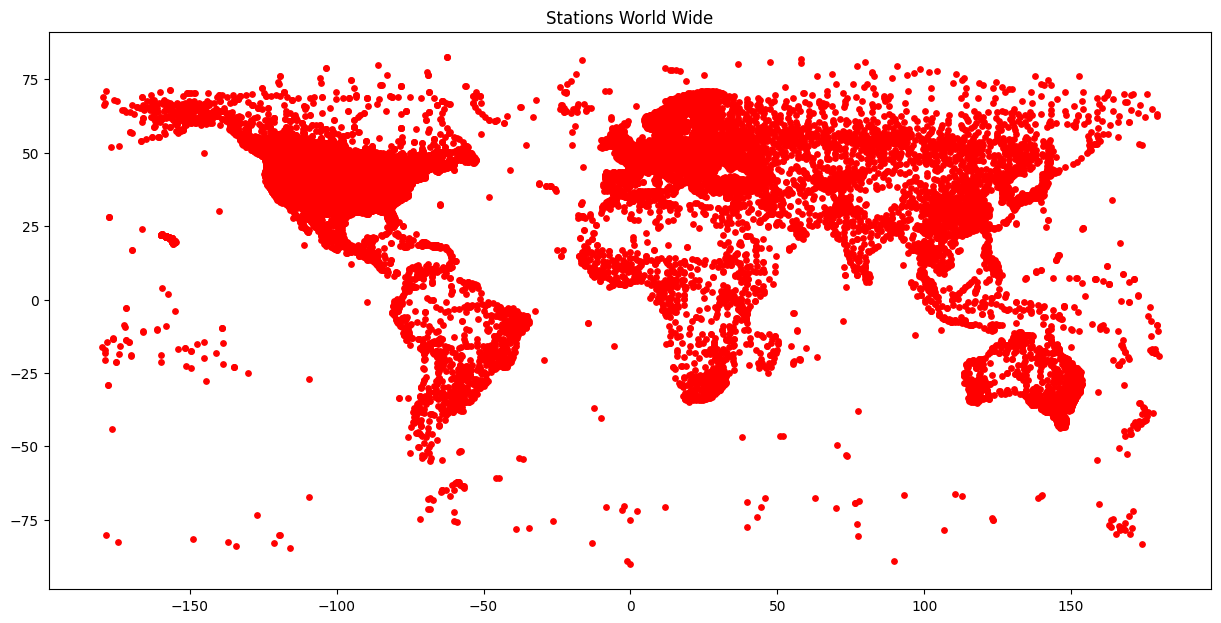

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title("Stations World Wide")
plt.show()
# There are about 27881 sations

In [21]:
# The number of stations in Ethiopia where data are recorded can be filtered from stations
ETH_Stationsdf = stations_pdf[stations_pdf['COUNTRY'] == "ET"]

In [22]:
ETH_Stationsdf

,ID,COUNTRY,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME
7021,ET000063330,ET,13.500,39.483,2070.0,ALE
7022,ET000063331,ET,12.550,37.417,1967.0,DAR
7023,ET000063332,ET,11.600,37.417,1770.0,AR_DAR
7024,ET000063333,ET,11.117,39.733,1903.0,BOLCHA
7025,ET000063334,ET,10.333,37.667,2515.0,REMARCOS
7026,ET000063340,ET,9.083,36.450,2080.0,EMTE
7027,ET000063402,ET,7.667,36.833,1725.0,MA
7028,ET000063403,ET,8.150,35.533,2002.0,E
7029,ET000063450,ET,9.033,38.750,2354.0,IS_ABABA_BOLE
7030,ET000063451,ET,8.733,38.950,1900.0,AR_MEDA


In [23]:
#The number of stations count in Ethiopia is 29 where temprature records are taken
ETH_Stationsdf.count()

ID              29
COUNTRY         29
LATITUDE        29
LONGITUDE       29
ELEVATION       29
STATION_NAME    29
dtype: int64

In [24]:
# Using geopandas for visualization using the lat and long values in stations


In [25]:
import geopandas as gpd2

In [26]:
geometryET = [Point(xy) for xy in zip(ETH_Stationsdf['LONGITUDE'], ETH_Stationsdf['LATITUDE'])]

In [27]:
gdf2 = GeoDataFrame(ETH_Stationsdf, geometry=geometryET)

In [28]:
import matplotlib.pyplot as pltt

Text(0.5, 1.0, 'Stations in Ethiopia')

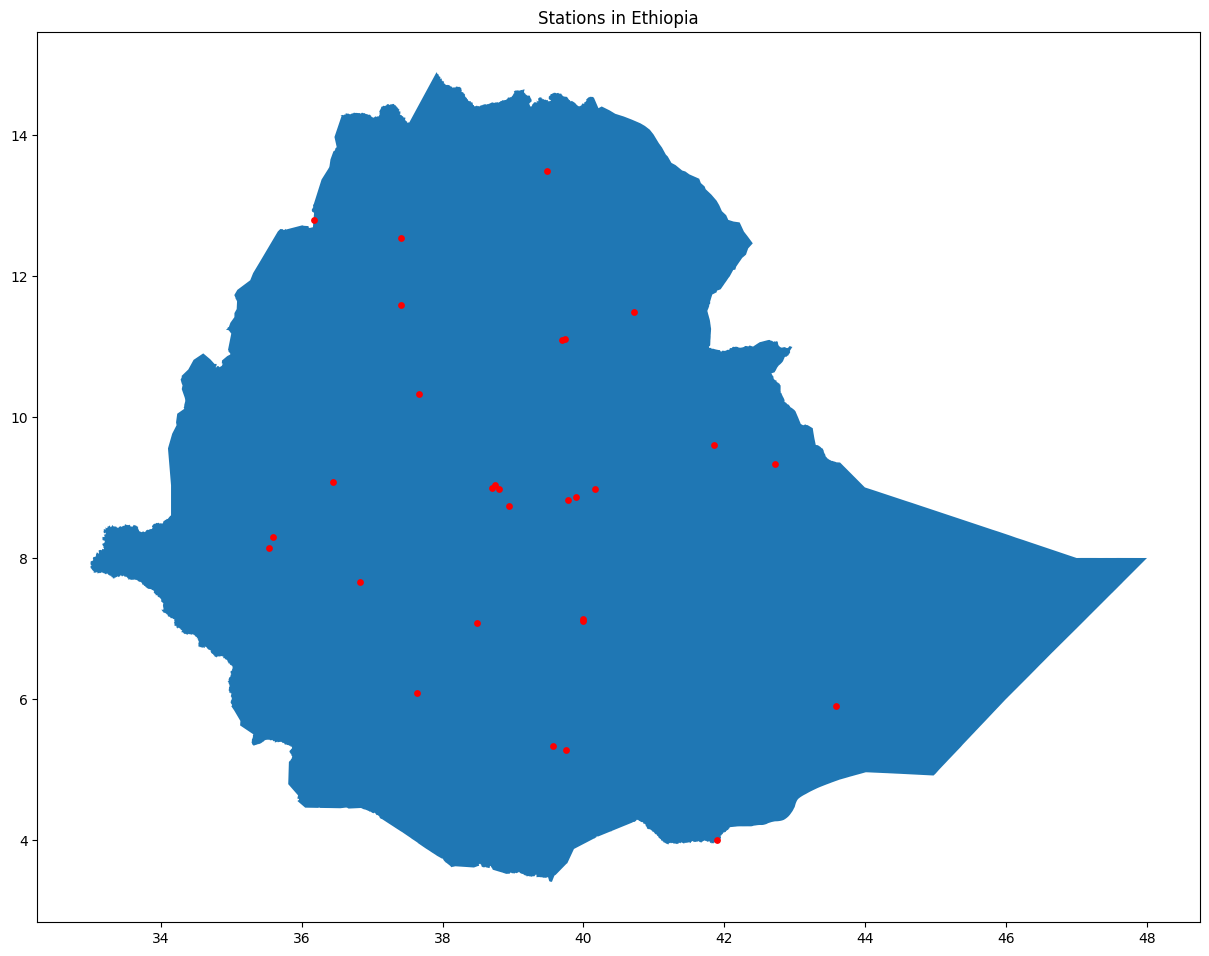

In [29]:
gdf2.plot(ax=et_map.plot(figsize=(15, 15)), marker='o', color='red', markersize=15)
pltt.title("Stations in Ethiopia")
# There are 29 Temprature recording stations in Ethiopia

In [30]:
ETH_Stationsdf.count()

ID              29
COUNTRY         29
LATITUDE        29
LONGITUDE       29
ELEVATION       29
STATION_NAME    29
dtype: int64

Analyzing the temprature data world wide

In [31]:
#DATA (.dat file) The data within GHCNM v4 for the time being consist of monthly average temperature.
# The data is converterd to .txt file for analysis and given a name "TempData.txt"

In [32]:
# Loading all the temprature data from the file
# shown in the previous code
# df_TempDataAll=spark.read.format("text").load("/content/TempData.txt")
# TempDataAllMonths=df_TempDataAll.select(
#        )
#TempDataAllMonths.show()

In [33]:
TempDataAllMonths.show()

+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|         ID|COUNTRY|DATE|ELEMENT|VALUE-JAN|DQS-1|VALUE-FEB|DQS-2|VALUE-MAR|DQS-3|VALUE-APR|DQS-4|VALUE-MAY|DQS-5|VALUE-JUN|DQS-6|VALUE-JUL|DQS-7|VALUE-AUG|DQS-8|VALUE-SEP|DQS-9|VALUE-OCT|DQS-10|VALUE-NOV|DQS-11|VALUE-DEC|DQS-12|
+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|ACW00011604|     AC|1961|   TAVG|     -142|    k|      183|    k|      419|    k|      720|    k|     1075|    k|     1546|    k|     1517|    k|     1428|    k|     1360|    k|     1121|     k|      457|     k|      -92|     k|
|ACW00011604|     AC|1962|   TAVG|       60|    k|       32|    k|     -207|    

In [34]:
# The total number of records in all
TempDataAllMonths.count()

1457537

In [35]:
# For visualization import the necessary files

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


In [36]:
#Convert dataframe to pandas
pandas_Df = TempDataAllMonths.show()

+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|         ID|COUNTRY|DATE|ELEMENT|VALUE-JAN|DQS-1|VALUE-FEB|DQS-2|VALUE-MAR|DQS-3|VALUE-APR|DQS-4|VALUE-MAY|DQS-5|VALUE-JUN|DQS-6|VALUE-JUL|DQS-7|VALUE-AUG|DQS-8|VALUE-SEP|DQS-9|VALUE-OCT|DQS-10|VALUE-NOV|DQS-11|VALUE-DEC|DQS-12|
+-----------+-------+----+-------+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+-----+---------+------+---------+------+---------+------+
|ACW00011604|     AC|1961|   TAVG|     -142|    k|      183|    k|      419|    k|      720|    k|     1075|    k|     1546|    k|     1517|    k|     1428|    k|     1360|    k|     1121|     k|      457|     k|      -92|     k|
|ACW00011604|     AC|1962|   TAVG|       60|    k|       32|    k|     -207|    

In [37]:
import seaborn as sns

In [38]:
import pandas as pd

In [39]:
#Write the dataframe to csv or paraquet file for easy analysis

In [40]:
#TempDataAllMonths.write.text("/content/TempratureD.text")

In [41]:
#TempDataAllMonths.write.format("com.databricks.spark.csv").option("header", "true").save("output.csv")

In [42]:
#TempDataAllMonths.write.format("text").save("/content/TempratureE.csv")

In [43]:
# Preparing the data
# We want our data to be indexed by "DATE" column when we read our file from CSV file whic is the second column

In [44]:
tempratureAll = pd.read_csv("/content/TemperatureData_qcf(A-T)B.csv", index_col=3)

In [45]:
tempratureAll

,ID,COUNTRY,STATION-ID,ELEMENT,VALUE-JAN,DQS-1,VALUE-FEB,DQS-2,VALUE-MAR,DQS-3,...,VALUE-AUG,DQS-8,VALUE-SEP,DQS-9,VALUE-OCT,DQS-10,VALUE-NOV,DQS-11,VALUE-DEC,DQS-12
YEAR,,,,,,,,,,,,,,,,,,,,,
1961,ACW000116041961TAVG,AC,ACW00011604,TAVG,-95,k,230,k,466,k,...,1475,k,1407,k,1168,k,504,k,-45,k
1962,ACW000116041962TAVG,AC,ACW00011604,TAVG,107,k,79,k,-160,k,...,1387,k,1157,k,988,k,317,k,-132,k
1963,ACW000116041963TAVG,AC,ACW00011604,TAVG,-719,k,-559,k,-105,k,...,1590,k,1326,k,934,k,560,k,-114,k
1964,ACW000116041964TAVG,AC,ACW00011604,TAVG,56,k,-91,k,49,k,...,1551,k,1215,k,782,k,540,k,106,k
1965,ACW000116041965TAVG,AC,ACW00011604,TAVG,38,k,-111,k,32,k,...,1471,k,1371,k,968,k,25,k,-184,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,TZXLT9737331951TAVG,TZ,TZXLT973733,TAVG,-9999,X9,-9999,X9,-9999,X9,...,-9999,X9,-9999,X9,-9999,X9,-9999,X9,-9999,X9
1952,TZXLT9737331952TAVG,TZ,TZXLT973733,TAVG,-9999,X9,-9999,X9,-9999,X9,...,-9999,X9,-9999,X9,-9999,X9,-9999,X9,-9999,X9
1953,TZXLT9737331953TAVG,TZ,TZXLT973733,TAVG,-9999,X9,-9999,X9,-9999,X9,...,-9999,X9,-9999,Q9,-9999,Q9,-9999,X9,-9999,X9


In [46]:
# To clean our data for machine learning, we remove missing values (-9999)

In [47]:
# we want to filter data by country and then by station in Ethiopia (Diredawa in my case)

In [48]:
# The staion ID for DireDawa is "ET000063471"

In [49]:
# IF I want to filter for the whole of Ethiopia I can fileter by "ET" for country
# & (tempratureAll['VALUE-JAN'] != -9999)

In [50]:
Ethiopia_Filter_df = tempratureAll[(tempratureAll['COUNTRY'] == "ET") & (tempratureAll['STATION-ID'] == "ET000063471")]

In [51]:
Ethiopia_Filter_df

,ID,COUNTRY,STATION-ID,ELEMENT,VALUE-JAN,DQS-1,VALUE-FEB,DQS-2,VALUE-MAR,DQS-3,...,VALUE-AUG,DQS-8,VALUE-SEP,DQS-9,VALUE-OCT,DQS-10,VALUE-NOV,DQS-11,VALUE-DEC,DQS-12
YEAR,,,,,,,,,,,,,,,,,,,,,
1952,ET0000634711952TAVG,ET,ET000063471,TAVG,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,QQ,-9999,QQ,-9999,QQ,2388,Q,2251,Q
1953,ET0000634711953TAVG,ET,ET000063471,TAVG,2284,Q,2426,Q,2680,Q,...,-9999,QQ,2493,Q,2594,Q,2323,Q,2136,Q
1954,ET0000634711954TAVG,ET,ET000063471,TAVG,-9999,NaN,2499,Q,2597,Q,...,2492,Q,2602,Q,2482,Q,2330,Q,2145,Q
1955,ET0000634711955TAVG,ET,ET000063471,TAVG,2188,Q,-9999,NaN,-9999,NaN,...,2497,Q,2538,Q,-9999,XQ,-9999,XQ,-9999,XQ
1956,ET0000634711956TAVG,ET,ET000063471,TAVG,-9999,XQ,-9999,XQ,-9999,XQ,...,-9999,XQ,-9999,XQ,-9999,XQ,-9999,XQ,-9999,XQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,ET0000634712019TAVG,ET,ET000063471,TAVG,2160,P,2450,P,-9999,NaN,...,-9999,NaN,2690,3,-9999,NaN,2355,|,2300,P
2020,ET0000634712020TAVG,ET,ET000063471,TAVG,-9999,NaN,-9999,NaN,-9999,NaN,...,-9999,QP,2650,|,-9999,Q|,2380,|,2280,P
2021,ET0000634712021TAVG,ET,ET000063471,TAVG,2185,|,-9999,NaN,2610,|,...,2690,|,2685,|,-9999,QP,2410,P,2230,3


In [52]:
from pyspark.sql.functions import col, contains

In [53]:
from pyspark.sql.functions import mean

In [54]:
core_weather = Ethiopia_Filter_df[["VALUE-JAN", "VALUE-FEB", "VALUE-MAR", "VALUE-APR", "VALUE-MAY", "VALUE-JUN", "VALUE-JUL", "VALUE-AUG", "VALUE-SEP", "VALUE-OCT", "VALUE-NOV", "VALUE-DEC"]].copy()

In [55]:
core_weather.columns = ["VALUE-JAN", "VALUE-FEB", "VALUE-MAR", "VALUE-APR", "VALUE-MAY", "VALUE-JUN", "VALUE-JUL", "VALUE-AUG", "VALUE-SEP", "VALUE-OCT", "VALUE-NOV", "VALUE-DEC"]

In [56]:
# Dire Dawa temprature data filtered from [1952-2023]

In [57]:
core_weather

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,2388,2251
1953,2284,2426,2680,-9999,2735,2835,2406,-9999,2493,2594,2323,2136
1954,-9999,2499,2597,2686,2846,2865,2579,2492,2602,2482,2330,2145
1955,2188,-9999,-9999,2624,2811,3006,2662,2497,2538,-9999,-9999,-9999
1956,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2160,2450,-9999,2870,-9999,-9999,2855,-9999,2690,-9999,2355,2300
2020,-9999,-9999,-9999,-9999,2810,-9999,2760,-9999,2650,-9999,2380,2280
2021,2185,-9999,2610,-9999,-9999,3000,2605,2690,2685,-9999,2410,2230


In [58]:
# core_weather[['VALUE-JAN','VALUE-FEB','VALUE-MAR','VALUE-APR','VALUE-MAY','VALUE-JUN','VALUE-JUL','VALUE-AUG','VALUE-SEP','VALUE-OCT','VALUE-NOV','VALUE-DEC']] = core_weather[['VALUE-JAN','VALUE-FEB','VALUE-MAR','VALUE-APR','VALUE-MAY','VALUE-JUN','VALUE-JUL','VALUE-AUG','VALUE-SEP','VALUE-OCT','VALUE-NOV','VALUE-DEC']].replace(-9999, 0)

In [59]:
core_weather

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,2388,2251
1953,2284,2426,2680,-9999,2735,2835,2406,-9999,2493,2594,2323,2136
1954,-9999,2499,2597,2686,2846,2865,2579,2492,2602,2482,2330,2145
1955,2188,-9999,-9999,2624,2811,3006,2662,2497,2538,-9999,-9999,-9999
1956,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2160,2450,-9999,2870,-9999,-9999,2855,-9999,2690,-9999,2355,2300
2020,-9999,-9999,-9999,-9999,2810,-9999,2760,-9999,2650,-9999,2380,2280
2021,2185,-9999,2610,-9999,-9999,3000,2605,2690,2685,-9999,2410,2230


In [60]:
import numpy as np

core_weather[['VALUE-JAN','VALUE-FEB','VALUE-MAR','VALUE-APR','VALUE-MAY','VALUE-JUN','VALUE-JUL','VALUE-AUG','VALUE-SEP','VALUE-OCT','VALUE-NOV','VALUE-DEC']] = core_weather[['VALUE-JAN','VALUE-FEB','VALUE-MAR','VALUE-APR','VALUE-MAY','VALUE-JUN','VALUE-JUL','VALUE-AUG','VALUE-SEP','VALUE-OCT','VALUE-NOV','VALUE-DEC']].replace(-9999, np.nan)

In [61]:
core_weather

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388.0,2251.0
1953,2284.0,2426.0,2680.0,NaN,2735.0,2835.0,2406.0,NaN,2493.0,2594.0,2323.0,2136.0
1954,NaN,2499.0,2597.0,2686.0,2846.0,2865.0,2579.0,2492.0,2602.0,2482.0,2330.0,2145.0
1955,2188.0,NaN,NaN,2624.0,2811.0,3006.0,2662.0,2497.0,2538.0,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2160.0,2450.0,NaN,2870.0,NaN,NaN,2855.0,NaN,2690.0,NaN,2355.0,2300.0
2020,NaN,NaN,NaN,NaN,2810.0,NaN,2760.0,NaN,2650.0,NaN,2380.0,2280.0
2021,2185.0,NaN,2610.0,NaN,NaN,3000.0,2605.0,2690.0,2685.0,NaN,2410.0,2230.0


In [62]:
# prompt: Using dataframe core_weather:

import pandas as pd
# Compute the average temperature for each month
avg_temps = core_weather.mean(axis=0)

In [63]:
# Create a new DataFrame with the month names and average temperatures
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_temps_df = pd.DataFrame({'Month': months, 'AvgTemp': avg_temps})

In [64]:
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [65]:
avg_temps_df

,Month,AvgTemp
VALUE-JAN,Jan,2198.703704
VALUE-FEB,Feb,2349.000000
VALUE-MAR,Mar,2547.685185
VALUE-APR,Apr,2649.666667
VALUE-MAY,May,2788.896552
VALUE-JUN,Jun,2884.851852
VALUE-JUL,Jul,2713.864407
VALUE-AUG,Aug,2654.464286
VALUE-SEP,Sep,2671.210526
VALUE-OCT,Oct,2567.345455


<Axes: xlabel='Month', ylabel='AvgTemp'>

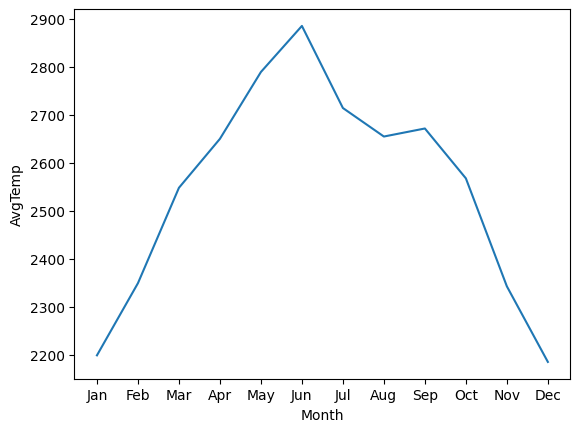

In [66]:
sns.lineplot(data=avg_temps_df, x='Month', y='AvgTemp')

In [67]:
# prompt: Using dataframe core_weather:

import pandas as pd
# Compute the average temperature for each month
avg_temps = core_weather.mean(axis=0)

# Create a new DataFrame with the month names and average temperatures
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_temps_df = pd.DataFrame({'Month': months, 'AvgTemp': avg_temps})

# Plot the average temperatures for each month
#sns.lineplot(data=avg_temps_df, x='Month', y='Avg

In [68]:
core_weather.apply(pd.isnull).sum()

VALUE-JAN    18
VALUE-FEB    16
VALUE-MAR    18
VALUE-APR    15
VALUE-MAY    14
VALUE-JUN    18
VALUE-JUL    13
VALUE-AUG    16
VALUE-SEP    15
VALUE-OCT    17
VALUE-NOV    13
VALUE-DEC    17
dtype: int64

In [69]:
core_weather

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388.0,2251.0
1953,2284.0,2426.0,2680.0,NaN,2735.0,2835.0,2406.0,NaN,2493.0,2594.0,2323.0,2136.0
1954,NaN,2499.0,2597.0,2686.0,2846.0,2865.0,2579.0,2492.0,2602.0,2482.0,2330.0,2145.0
1955,2188.0,NaN,NaN,2624.0,2811.0,3006.0,2662.0,2497.0,2538.0,NaN,NaN,NaN
1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2160.0,2450.0,NaN,2870.0,NaN,NaN,2855.0,NaN,2690.0,NaN,2355.0,2300.0
2020,NaN,NaN,NaN,NaN,2810.0,NaN,2760.0,NaN,2650.0,NaN,2380.0,2280.0
2021,2185.0,NaN,2610.0,NaN,NaN,3000.0,2605.0,2690.0,2685.0,NaN,2410.0,2230.0


In [70]:
avg_temps

VALUE-JAN    2198.703704
VALUE-FEB    2349.000000
VALUE-MAR    2547.685185
VALUE-APR    2649.666667
VALUE-MAY    2788.896552
VALUE-JUN    2884.851852
VALUE-JUL    2713.864407
VALUE-AUG    2654.464286
VALUE-SEP    2671.210526
VALUE-OCT    2567.345455
VALUE-NOV    2342.457627
VALUE-DEC    2185.000000
dtype: float64

In [71]:
core_weather.isnull().sum()

VALUE-JAN    18
VALUE-FEB    16
VALUE-MAR    18
VALUE-APR    15
VALUE-MAY    14
VALUE-JUN    18
VALUE-JUL    13
VALUE-AUG    16
VALUE-SEP    15
VALUE-OCT    17
VALUE-NOV    13
VALUE-DEC    17
dtype: int64

In [72]:
# Replace NaN values with average at it will be more convenient for machine learning

In [73]:
import pandas as pd

In [74]:
DireDawa_Corrected = pd.read_csv("/content/Diredawa_Summary_Missing_Filled.csv", index_col=0)

In [75]:
DireDawa_Corrected

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,2199,2346,2548,2652,2794,2886,2714,2662,2674,2570,2388,2251
1953,2199,2346,2200,2380,2495,2680,2406,2484,2436,2341,2179,2042
1954,2199,2346,2324,2428,2512,2755,2535,2492,2493,2410,2215,2045
1955,2199,2346,2351,2429,2559,2777,2579,2497,2538,2418,2241,2068
1956,2199,2346,2358,2448,2610,2779,2588,2517,2549,2440,2262,2080
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2195,2170,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184
2020,2180,2160,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184
2021,2329,2142,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184


In [76]:
# There are no misssing values and we are good for machine learning

In [77]:
DireDawa_Corrected.apply(pd.isnull).sum()

VALUE-JAN    0
VALUE-FEB    0
VALUE-MAR    0
VALUE-APR    0
VALUE-MAY    0
VALUE-JUN    0
VALUE-JUL    0
VALUE-AUG    0
VALUE-SEP    0
VALUE-OCT    0
VALUE-NOV    0
VALUE-DEC    0
dtype: int64

In [78]:
# we need to make sure that the data types we use for predictions are numeriacl data types

In [79]:
DireDawa_Corrected.dtypes

VALUE-JAN    int64
VALUE-FEB    int64
VALUE-MAR    int64
VALUE-APR    int64
VALUE-MAY    int64
VALUE-JUN    int64
VALUE-JUL    int64
VALUE-AUG    int64
VALUE-SEP    int64
VALUE-OCT    int64
VALUE-NOV    int64
VALUE-DEC    int64
dtype: object

In [80]:
# And also make sure our index is right

In [81]:
DireDawa_Corrected.index

Int64Index([1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
            1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
            1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
            1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='YEAR')

In [82]:
#DireDawa_Corrected.index = pd.to_datetime()

In [83]:
#DireDawa_Corrected.index

<Axes: xlabel='YEAR'>

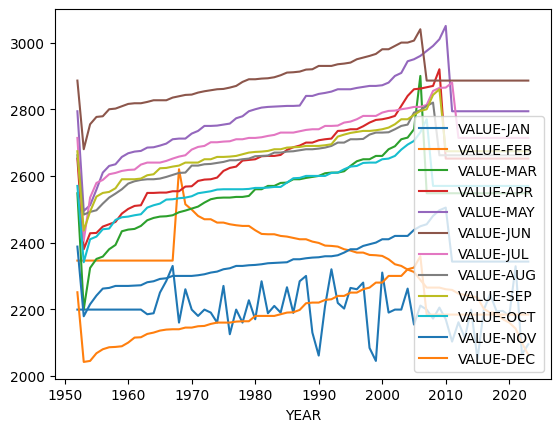

In [84]:
DireDawa_Corrected[["VALUE-JAN", "VALUE-FEB","VALUE-MAR", "VALUE-APR", "VALUE-MAY", "VALUE-JUN","VALUE-JUL", "VALUE-AUG","VALUE-SEP", "VALUE-OCT", "VALUE-NOV", "VALUE-DEC"]].plot()

<Axes: xlabel='YEAR'>

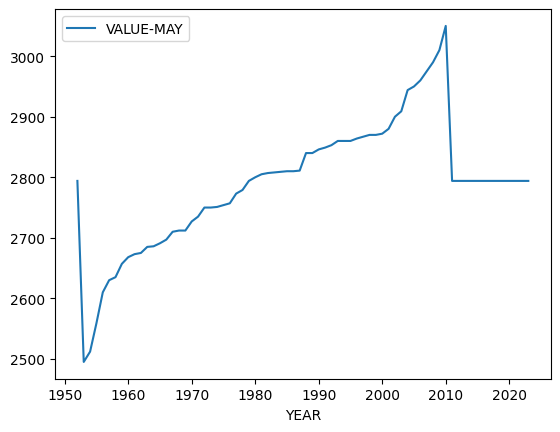

In [85]:
DireDawa_Corrected[["VALUE-MAY"]].plot()

Machine Learning

In [86]:
# we use machine learning to predict tomorrows temprature fo the month of MAY

In [87]:
DireDawa_Corrected["target"] = DireDawa_Corrected.shift(-1)["VALUE-MAY"]

In [88]:
DireDawa_Corrected

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC,target
YEAR,,,,,,,,,,,,,
1952,2199,2346,2548,2652,2794,2886,2714,2662,2674,2570,2388,2251,2495.0
1953,2199,2346,2200,2380,2495,2680,2406,2484,2436,2341,2179,2042,2512.0
1954,2199,2346,2324,2428,2512,2755,2535,2492,2493,2410,2215,2045,2559.0
1955,2199,2346,2351,2429,2559,2777,2579,2497,2538,2418,2241,2068,2610.0
1956,2199,2346,2358,2448,2610,2779,2588,2517,2549,2440,2262,2080,2630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2195,2170,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0
2020,2180,2160,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0
2021,2329,2142,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0


In [89]:
# To get rid of the last row with missng value

In [90]:
DireDawa_Corrected = DireDawa_Corrected.iloc[:-1,:].copy()

In [91]:
DireDawa_Corrected

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC,target
YEAR,,,,,,,,,,,,,
1952,2199,2346,2548,2652,2794,2886,2714,2662,2674,2570,2388,2251,2495.0
1953,2199,2346,2200,2380,2495,2680,2406,2484,2436,2341,2179,2042,2512.0
1954,2199,2346,2324,2428,2512,2755,2535,2492,2493,2410,2215,2045,2559.0
1955,2199,2346,2351,2429,2559,2777,2579,2497,2538,2418,2241,2068,2610.0
1956,2199,2346,2358,2448,2610,2779,2588,2517,2549,2440,2262,2080,2630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2194,2189,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0
2019,2195,2170,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0
2020,2180,2160,2548,2652,2794,2886,2714,2662,2674,2570,2343,2184,2794.0


In [92]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [93]:
#predictors = [["VALUE-MAY"]]

In [94]:
predictors = [["VALUE-JAN", "VALUE-FEB","VALUE-MAR", "VALUE-APR", "VALUE-MAY", "VALUE-JUN","VALUE-JUL", "VALUE-AUG","VALUE-SEP", "VALUE-OCT", "VALUE-NOV", "VALUE-DEC"]]

In [95]:
predictors

[['VALUE-JAN',
  'VALUE-FEB',
  'VALUE-MAR',
  'VALUE-APR',
  'VALUE-MAY',
  'VALUE-JUN',
  'VALUE-JUL',
  'VALUE-AUG',
  'VALUE-SEP',
  'VALUE-OCT',
  'VALUE-NOV',
  'VALUE-DEC']]

In [96]:
train = DireDawa_Corrected.loc[:"2000"]
test = DireDawa_Corrected.loc["2001":]

In [97]:
train

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC,target
YEAR,,,,,,,,,,,,,
1952,2199,2346,2548,2652,2794,2886,2714,2662,2674,2570,2388,2251,2495.0
1953,2199,2346,2200,2380,2495,2680,2406,2484,2436,2341,2179,2042,2512.0
1954,2199,2346,2324,2428,2512,2755,2535,2492,2493,2410,2215,2045,2559.0
1955,2199,2346,2351,2429,2559,2777,2579,2497,2538,2418,2241,2068,2610.0
1956,2199,2346,2358,2448,2610,2779,2588,2517,2549,2440,2262,2080,2630.0
1957,2199,2346,2380,2455,2630,2800,2605,2535,2552,2442,2264,2086,2635.0
1958,2199,2346,2393,2462,2635,2802,2609,2547,2563,2468,2270,2087,2657.0
1959,2199,2346,2434,2487,2657,2809,2615,2560,2590,2476,2270,2089,2668.0
1960,2199,2346,2439,2501,2668,2816,2618,2577,2590,2478,2270,2100,2673.0


In [98]:
test

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC,target
YEAR,,,,,,,,,,,,,
2001,2190,2350,2680,2774,2880,2980,2795,2731,2745,2652,2410,2300,2900.0
2002,2199,2335,2689,2780,2900,2990,2796,2740,2755,2660,2420,2300,2909.0
2003,2199,2330,2710,2810,2909,3000,2800,2750,2770,2679,2420,2300,2944.0
2004,2262,2319,2715,2840,2944,3000,2803,2754,2770,2694,2420,2320,2950.0
2005,2154,2312,2740,2860,2950,3006,2807,2790,2783,2705,2438,2325,2960.0
2006,2211,2288,2900,2862,2960,3040,2807,2797,2795,2731,2449,2359,2975.0
2007,2199,2265,2548,2866,2975,2886,2813,2810,2800,2770,2455,2184,2990.0
2008,2172,2265,2548,2870,2990,2886,2855,2820,2843,2570,2480,2184,3010.0
2009,2205,2265,2548,2920,3010,2886,2864,2662,2860,2570,2497,2184,3050.0


In [99]:
#predictors = ['VALUE-JAN', 'VALUE-FEB', 'VALUE-MAR', 'VALUE-APR', 'VALUE-MAY', 'VALUE-JUN', 'VALUE-JUL', 'VALUE-AUG', 'VALUE-SEP', 'VALUE-OCT', 'VALUE-NOV', 'VALUE-DEC']

In [100]:
train[list(predictors[0])]

,VALUE-JAN,VALUE-FEB,VALUE-MAR,VALUE-APR,VALUE-MAY,VALUE-JUN,VALUE-JUL,VALUE-AUG,VALUE-SEP,VALUE-OCT,VALUE-NOV,VALUE-DEC
YEAR,,,,,,,,,,,,
1952,2199,2346,2548,2652,2794,2886,2714,2662,2674,2570,2388,2251
1953,2199,2346,2200,2380,2495,2680,2406,2484,2436,2341,2179,2042
1954,2199,2346,2324,2428,2512,2755,2535,2492,2493,2410,2215,2045
1955,2199,2346,2351,2429,2559,2777,2579,2497,2538,2418,2241,2068
1956,2199,2346,2358,2448,2610,2779,2588,2517,2549,2440,2262,2080
1957,2199,2346,2380,2455,2630,2800,2605,2535,2552,2442,2264,2086
1958,2199,2346,2393,2462,2635,2802,2609,2547,2563,2468,2270,2087
1959,2199,2346,2434,2487,2657,2809,2615,2560,2590,2476,2270,2089
1960,2199,2346,2439,2501,2668,2816,2618,2577,2590,2478,2270,2100


In [101]:
train["target"]

YEAR
1952    2495.0
1953    2512.0
1954    2559.0
1955    2610.0
1956    2630.0
1957    2635.0
1958    2657.0
1959    2668.0
1960    2673.0
1961    2675.0
1962    2685.0
1963    2686.0
1964    2691.0
1965    2697.0
1966    2710.0
1967    2712.0
1968    2712.0
1969    2727.0
1970    2735.0
1971    2750.0
1972    2750.0
1973    2751.0
1974    2754.0
1975    2757.0
1976    2773.0
1977    2779.0
1978    2794.0
1979    2800.0
1980    2805.0
1981    2807.0
1982    2808.0
1983    2809.0
1984    2810.0
1985    2810.0
1986    2811.0
1987    2840.0
1988    2840.0
1989    2846.0
1990    2849.0
1991    2853.0
1992    2860.0
1993    2860.0
1994    2860.0
1995    2864.0
1996    2867.0
1997    2870.0
1998    2870.0
1999    2872.0
2000    2880.0
Name: target, dtype: float64

In [102]:
reg.fit(train[list(predictors[0])], train["target"])

Ridge(alpha=0.1)

In [103]:
predictions = reg.predict(test[list(predictors[0])])

In [104]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

23875.04523952368

In [105]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [106]:
combined

,actual,predictions
YEAR,,
2001,2900.0,2827.680810
2002,2909.0,2851.361097
2003,2944.0,2917.150939
2004,2950.0,2939.244845
2005,2960.0,2907.507939
2006,2975.0,2775.263283
2007,2990.0,3040.870583
2008,3010.0,2681.935766
2009,3050.0,2659.448474


<Axes: xlabel='YEAR'>

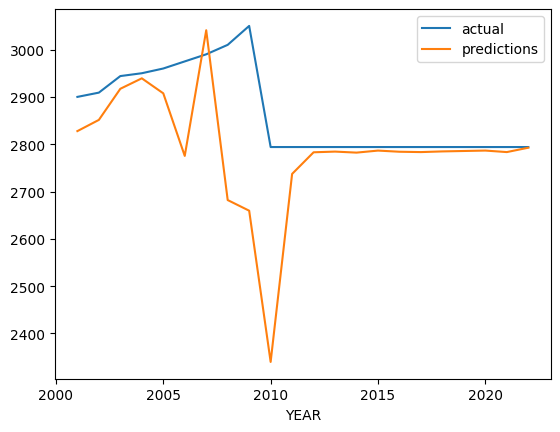

In [107]:
combined.plot()

In [108]:
reg.coef_

array([-0.0272743 , -0.04778397, -1.42532377,  0.4178234 ,  0.47481271,
        3.19403384, -0.28176031,  0.08347242,  1.08508824,  1.61844   ,
       -3.2174517 , -1.12525866])

In [109]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [110]:
combined["diff"]

YEAR
2001     72.319190
2002     57.638903
2003     26.849061
2004     10.755155
2005     52.492061
2006    199.736717
2007     50.870583
2008    328.064234
2009    390.551526
2010    454.189954
2011     56.818293
2012     11.102367
2013      9.629339
2014     11.804302
2015      7.501512
2016      9.940727
2017     10.669721
2018      9.230948
2019      8.350327
2020      7.463373
2021     10.667132
2022      1.412007
Name: diff, dtype: float64

In [111]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
YEAR,,,
2010,2794.0,2339.810046,454.189954
2009,3050.0,2659.448474,390.551526
2008,3010.0,2681.935766,328.064234
2006,2975.0,2775.263283,199.736717
2001,2900.0,2827.680810,72.319190
2002,2909.0,2851.361097,57.638903
2011,2794.0,2737.181707,56.818293
2005,2960.0,2907.507939,52.492061
2007,2990.0,3040.870583,50.870583
